# <center> LEAD SCORE ASSIGNMENT </center>

### Problem Statement :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google.
Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When 
these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the 
company also gets leads through past referrals. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, 
some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%. 

### Business Goal :

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying 
customers. 

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead 
score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Reading and Understanding the Data

Importing necessary packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the dataset

In [4]:
lead = pd.read_csv('Leads.csv', encoding = 'latin')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Dataset Information

In [5]:
print(lead.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
print(lead.shape)

(9240, 37)


In [7]:
print(lead.isnull().any())

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

In [8]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Cleaning

In [9]:
# check for percentage of null values in each column

missing_data = round(100*(lead.isnull().sum()/len(lead.index)), 2)
print(missing_data)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Some columns have more than 25% null values.

In [10]:
# Checking for duplicate values in the dataset

lead[lead.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicate values in the data.

### Converting 'Select' values to NaN.

In [11]:
lead['Specialization'] = lead['Specialization'].replace('Select', np.nan)
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace('Select', np.nan)
lead['Lead Profile'] = lead['Lead Profile'].replace('Select', np.nan)
lead['City'] = lead['City'].replace('Select', np.nan)

In [14]:
# checking for percentage of null values in each column

missing_data = round(100*(lead.isnull().sum()/len(lead.index)), 2)
print(missing_data)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [15]:
#dropping the columns that have more than 30% null values


lead = lead.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [16]:
#Checking for percentage of null values in each column 

missing_data = round(100*(lead.isnull().sum()/len(lead.index)), 2)
print(missing_data)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [17]:
#Value counts for each values in the country column

lead.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [18]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(lead[lead['Country'] == 'India'])/len(lead['Country']),2)
print(country_percentage)

70.26


In [19]:
#droping the 'Country' column

lead = lead.drop(['Country'], axis=1)

In [20]:
# Check the value counts for the column Lead Source

lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [21]:
#Imputing null values with 'google'

lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')

In [22]:
# Check the value counts for the column Total Visits

lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [23]:
# Check the median of column 

lead['TotalVisits'].median()

3.0

In [24]:
# Imputing the null values in TotalVisits by the median value 3.0

lead['TotalVisits'] = lead['TotalVisits'].replace(np.nan, lead['TotalVisits'].median())

In [25]:
# Check the value counts for Page Views Per Visit

lead['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [26]:
# Check the median of the column

lead['Page Views Per Visit'].median()

2.0

In [27]:
#impute the null values in 'Page Views Per Visit' by the median value 2.0

lead['Page Views Per Visit'] = lead['Page Views Per Visit'].replace(np.nan, lead['Page Views Per Visit'].median())

In [28]:
# Check the value counts for the column Last Activity

lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [29]:
# adding a new category 'Not Sure' for the null values

lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Not Sure')

In [30]:
# Check the value counts for the column "What is your current Occupation"

lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
#adding a new category called No Information and set that as value for the null columns

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'No Information')

In [33]:
# Check the value counts for the column What matters most to you in choosing a course 

lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
matters_most_percentage = round(100*len(lead[lead['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(lead['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


In [37]:
#dropping the column

lead = lead.drop(['What matters most to you in choosing a course'], axis=1)

In [38]:
# check for percentage of null values in each column

missing_data = round(100*(lead.isnull().sum()/len(lead.index)), 2)
print(missing_data)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data 
concentrated towards one value

In [39]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

lead = lead.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [40]:
lead.shape

(9240, 20)

#### Checking and fixing Outliers

In [41]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

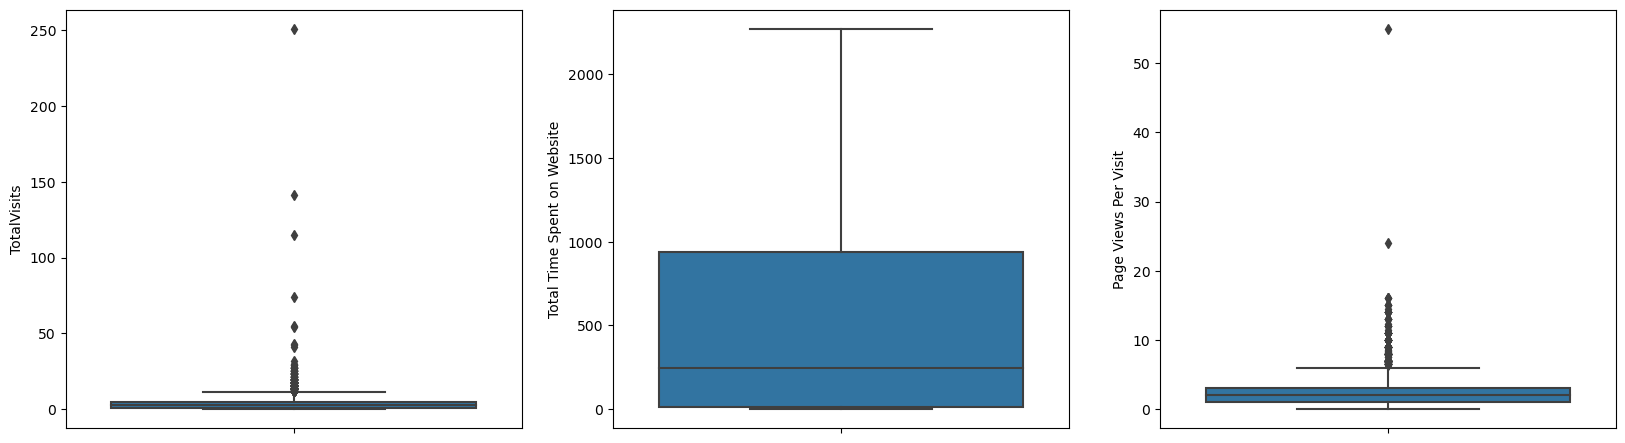

In [42]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits',  data = lead)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = lead)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = lead)
plt.show()

In [43]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = lead['TotalVisits'].quantile(0.99)
lead = lead[lead["TotalVisits"] < nn_quartile_total_visits]
lead["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [44]:
# Checking outliers at 25%,50%,75%,90%,95% and above

lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [46]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead["Page Views Per Visit"] < nn_quartile_page_visits]
lead["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [47]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [48]:
# Determine the percentage of data retained

num_data = round(100*(len(lead)/9240),2)
print(num_data)

97.72


### Step 3: Data Analysis


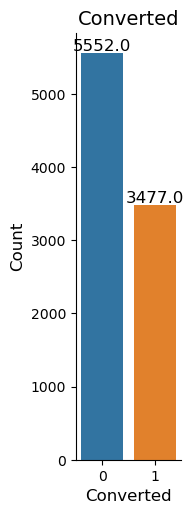

In [49]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=lead, aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12,  ha='center', va='bottom')
    
plt.show()

From the above graph, there has been a overall conversion rate of around 39%

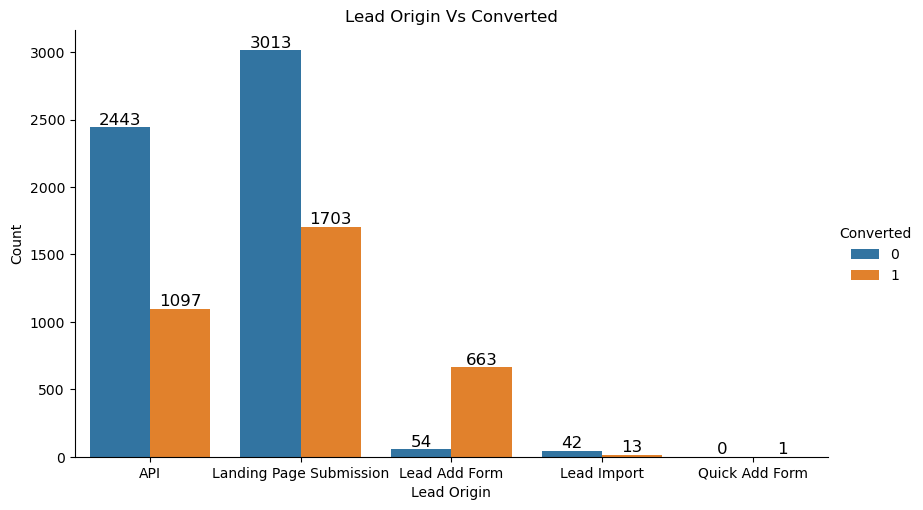

In [50]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead, aspect= 1.7);

plt.title('Lead Origin Vs Converted')
plt.xlabel("Lead Origin")
plt.ylabel("Count")

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')
    
plt.show()

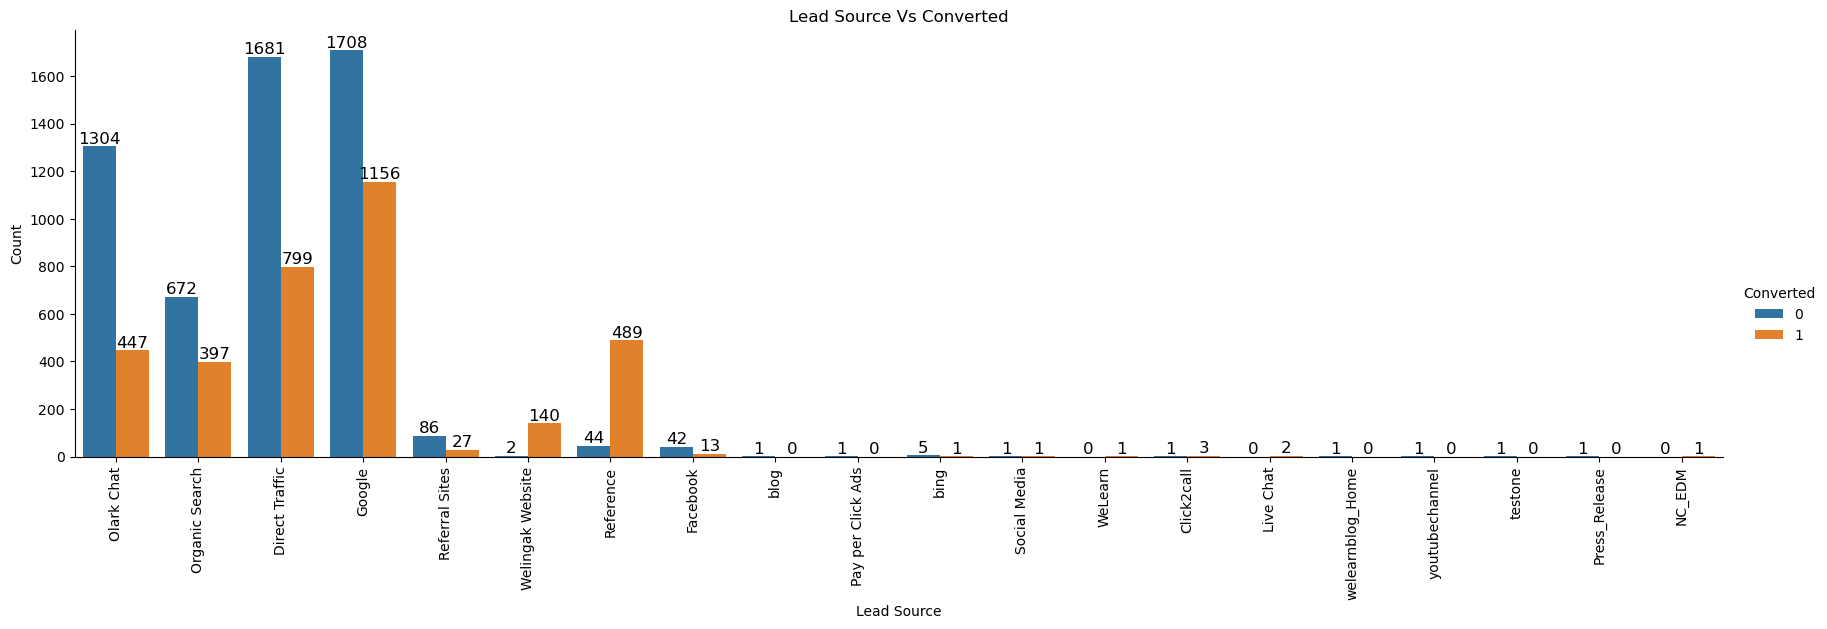

In [51]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead, aspect = 3.5);

plt.title('Lead Source Vs Converted')
plt.xlabel("Lead Source")
plt.ylabel("Count")
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')
   
plt.show()

From the above graph, it can be seen that major conversion in the lead source is from google

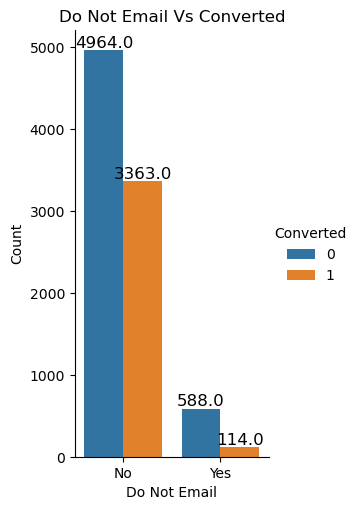

In [52]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead, aspect = 0.6);

plt.title('Do Not Email Vs Converted')
plt.xlabel("Do Not Email")
plt.ylabel("Count")

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

Based on the above graph, major conversion has happend from the emails that have been sent

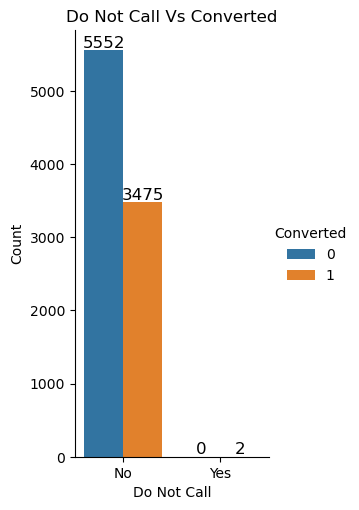

In [53]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead, aspect = 0.6);

plt.title('Do Not Call Vs Converted')
plt.xlabel("Do Not Call")
plt.ylabel("Count")

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

From the above graph , it can be noticed that major conversions happened when calls were made.
However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

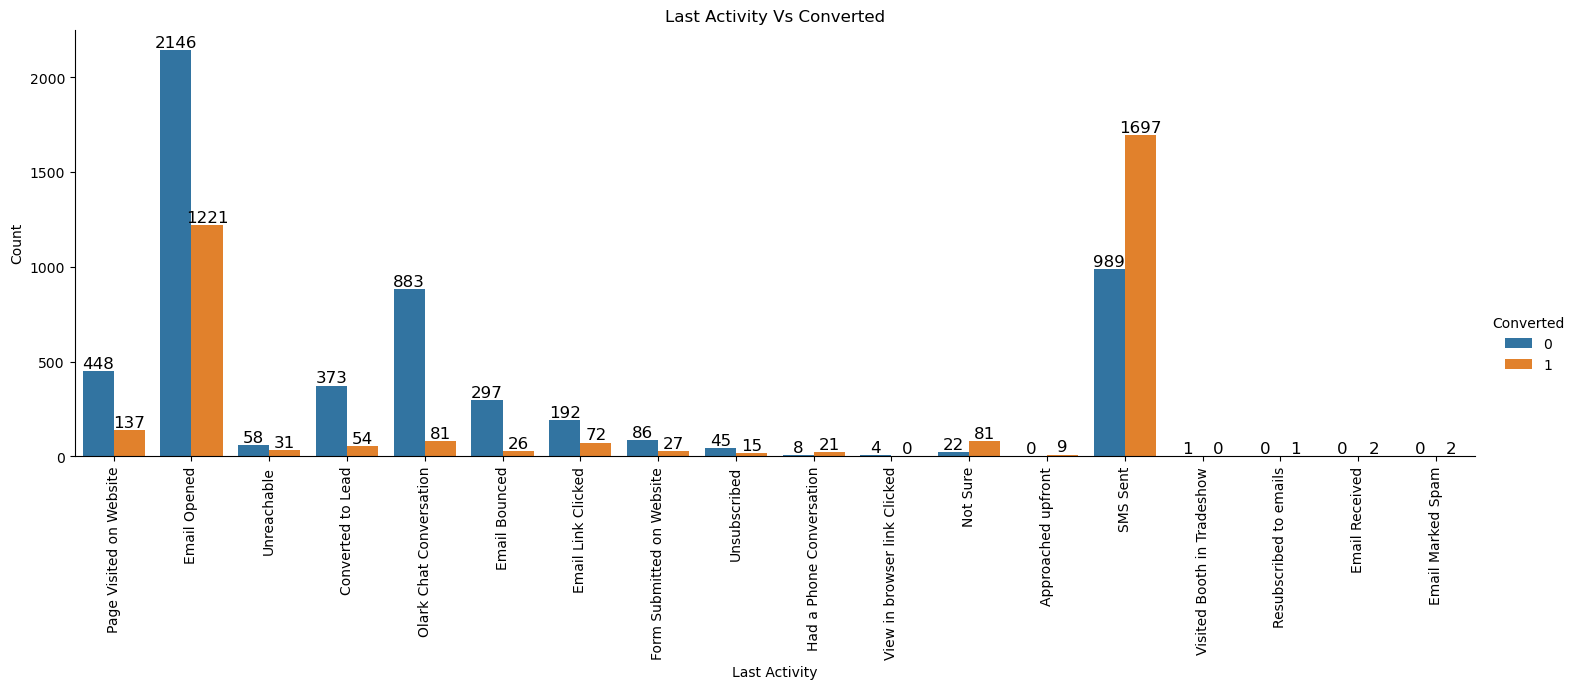

In [54]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead, aspect = 3.0);

plt.title('Last Activity Vs Converted')
plt.xlabel("Last Activity")
plt.ylabel("Count")
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

As per the above graph, last activity value of 'SMS Sent' had more conversion

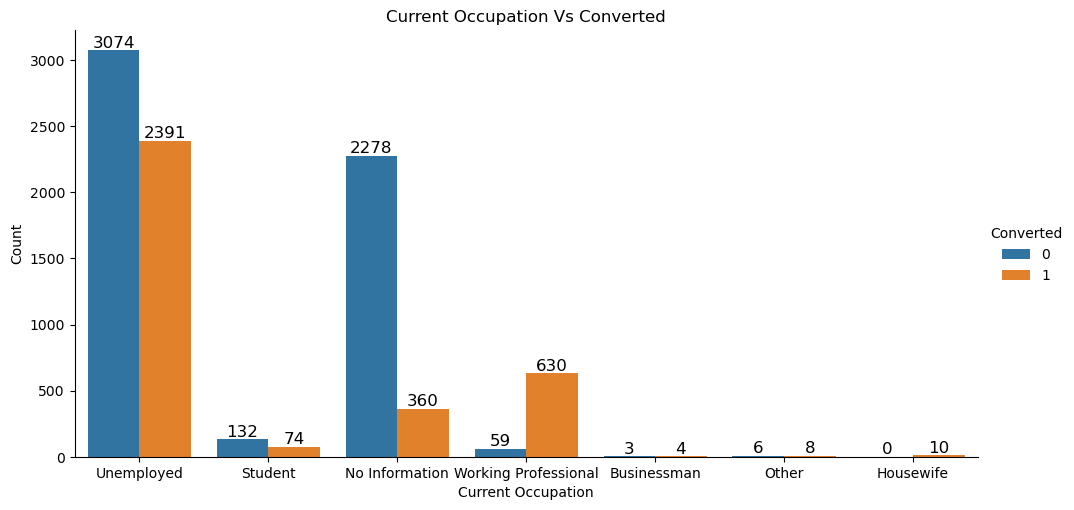

In [55]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead, 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted')
plt.xlabel("Current Occupation")
plt.ylabel("Count")

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that 
    - Out of 7 business men, 4 got converted
    - Out 10 housewives, all 10 leads got converted.

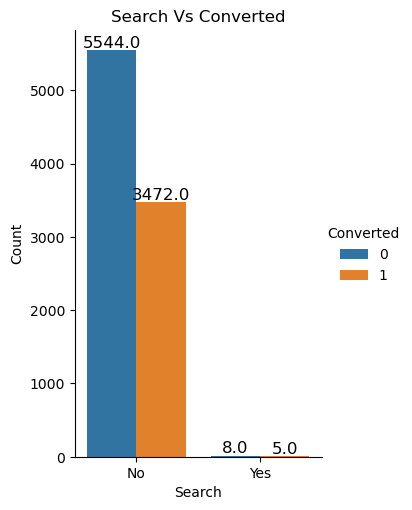

In [56]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=lead, aspect = 0.7);

plt.title('Search Vs Converted')
plt.xlabel("Search")
plt.ylabel("Count")

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search

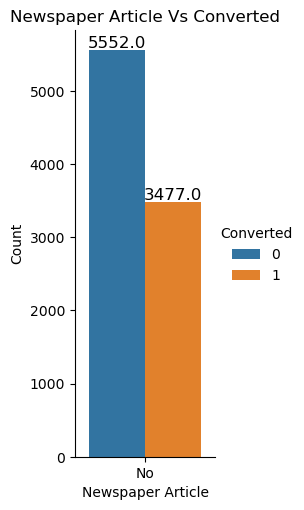

In [57]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=lead, aspect = 0.5);

plt.title('Newspaper Article Vs Converted')
plt.xlabel("Newspaper Article")
plt.ylabel("Count")

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column

In [58]:
# Dropping Newspaper Article

lead = lead.drop(['Newspaper Article'], axis=1)

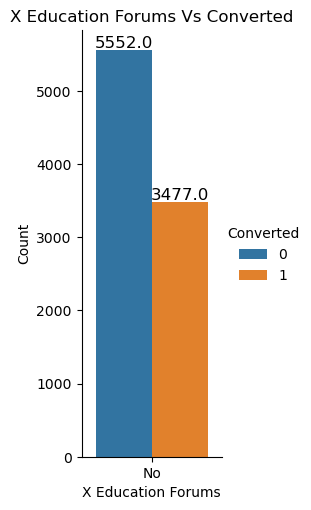

In [59]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=lead, aspect = 0.5);

plt.title('X Education Forums Vs Converted')
plt.xlabel("X Education Forums")
plt.ylabel("Count")

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column

In [60]:
# Dropping X Education Forum column

lead = lead.drop(['X Education Forums'], axis=1)

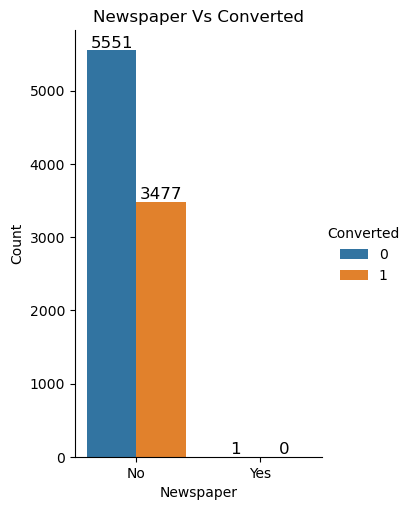

In [61]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=lead, aspect = 0.7);

plt.title('Newspaper Vs Converted')
plt.xlabel("Newspaper")
plt.ylabel("Count")

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [62]:
# Dropping Newspaper column

lead = lead.drop(['Newspaper'], axis=1)

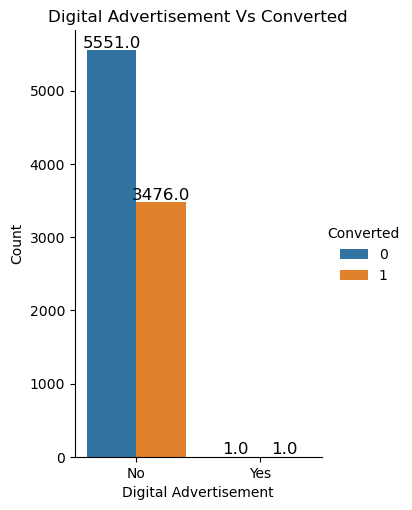

In [63]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=lead, aspect = 0.7);

plt.title('Digital Advertisement Vs Converted')
plt.xlabel("Digital Advertisement")
plt.ylabel("Count")

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

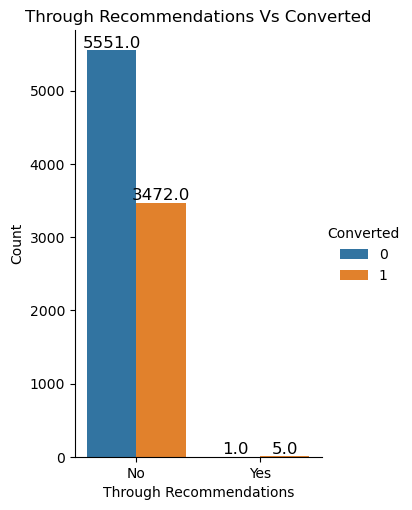

In [64]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=lead, aspect = 0.7);

plt.title('Through Recommendations Vs Converted')
plt.xlabel("Through Recommendations")
plt.ylabel("Count")

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted

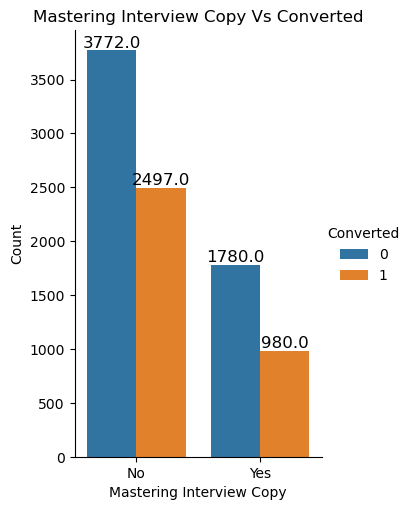

In [65]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=lead,
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted')
plt.xlabel("Mastering Interview Copy")
plt.ylabel("Count")

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

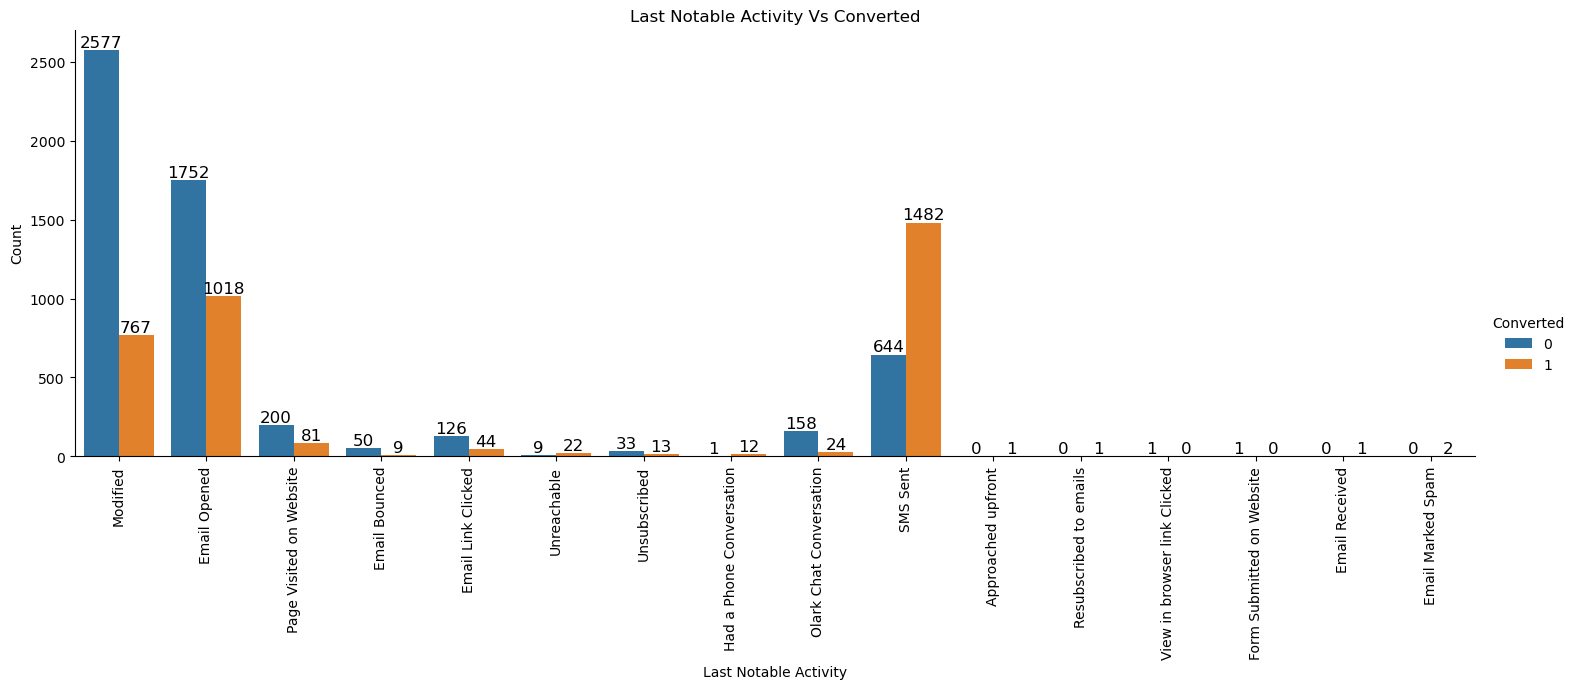

In [66]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=lead, aspect = 3.0);

plt.title('Last Notable Activity Vs Converted')
plt.xlabel("Last Notable Activity")
plt.ylabel("Count")
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12,  ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

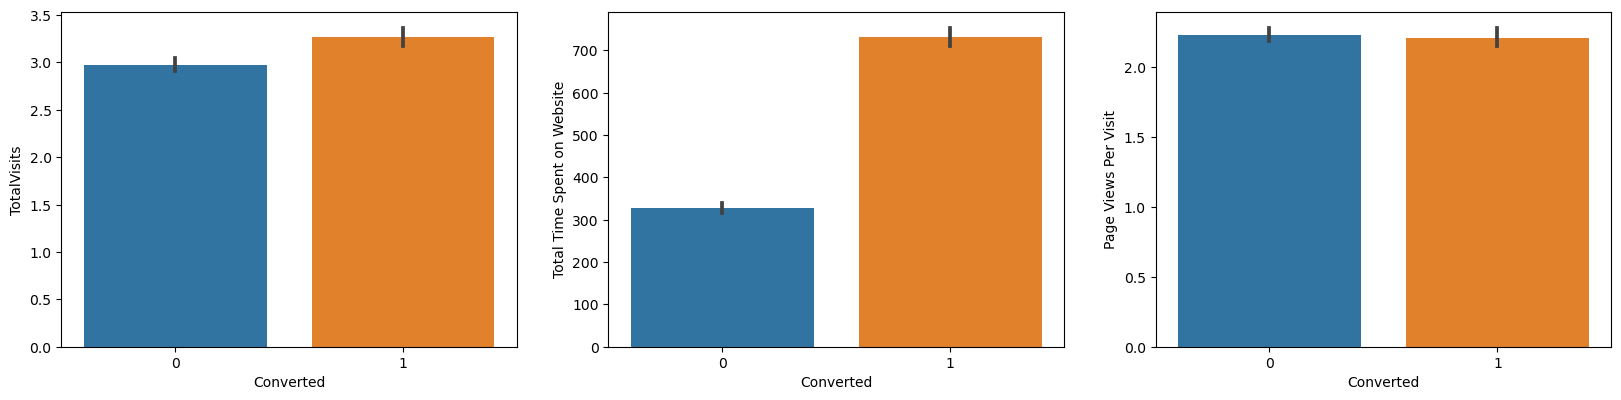

In [67]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted',data = lead)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = lead)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = lead)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

## Step 4: Data Preparation 

Converting some binary variables (Yes/No) to 0/1

In [68]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
lead[variablelist] = lead[variablelist].apply(binary_map)

### Creating dummies 

In [69]:
# Lead Origin

d_lead_origin = pd.get_dummies(lead['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
lead = pd.concat([lead, d_lead_origin1], axis = 1)

In [70]:
# Lead Source

d_lead_source = pd.get_dummies(lead['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
lead = pd.concat([lead,d_lead_source1], axis=1)

In [71]:
# last Activity

d_last_activity = pd.get_dummies(lead['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
lead = pd.concat([lead,d_last_activity1], axis=1)

In [73]:
# What is your current occupation

d_curr_occupation = pd.get_dummies(lead['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
lead = pd.concat([lead,d_curr_occupation1], axis=1)

In [74]:
# Last Notable Activity

d_last_notable_activity = pd.get_dummies(lead['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
lead = pd.concat([lead,d_last_notable_activity1], axis=1)

In [75]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
# Remove following columns from the lead

lead = lead.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)


In [77]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 77 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [78]:
# check for percentage of null values in each column

missing_data = round(100*(lead.isnull().sum()/len(lead.index)), 2)
print(missing_data)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 77, dtype: float64


In [79]:
# check shape of the data frame

lead.shape

(9029, 77)

Since there are around 71 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

### Step 5: Test-Train Split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
# Putting feature variable to X

X = lead.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
# Putting response variable to y

y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [83]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Step 6: Rescaling the features with MinMax Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [85]:
### Checking the Conversion Rate percentage

converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

38.50924797873519

 We have almost 39% conversion rate

### Step 7: Model Building
Assessing the model with StatsModels

#### Running the Initial Training Model

In [86]:
import statsmodels.api as sm

In [87]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 30 Jul 2024   Deviance:                   1.6910e+05
Time:                        12:16:57   Pearson chi2:                 8.27e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             9.202e+14    6.4e+07   1.44e+07      0.000     9.2e+14     9.2e+14
Do Not Email                                      1.883e+14   4.48e+06    4.2e+07      0.000    1.88e+14    1.88e+14
Do Not Call                                      -9.861e+13   4.76e+07  -2.07e+06      0.000   -9.86e+13   -9.86e+13
TotalVisits                                       1.117e+15   7.66e+06   1.46e+08      0.000    1.12e+15    1.12e+15
Total Time Spent on Website                       2.985e+15   4.01e+06   7.44e+08      0.000    2.98e+15    2.98e+15
Page Views Per Visit                             -4.664e+14   6.53e+06  -7.14e+07      0.000   -4.66e+14   -4.66e+14
Search                                           -8.146e+14   2.44e+07  -3.34e+07      0.000   -8.15e+14   -8.15e+14
Digital Advertisement                            -9.155e+14   4.76e+07  -1.92e+07      0.000   -9.15e+14   -9.15e+14
Through Recommendations                          -7.815e+14    4.2e+07  -1.86e+07      0.000   -7.82e+14   -7.82e+14
A free copy of Mastering The Interview           -1.438e+14   2.69e+06  -5.34e+07      0.000   -1.44e+14   -1.44e+14
LeadOrigin_API                                   -3.667e+15   6.74e+07  -5.44e+07      0.000   -3.67e+15   -3.67e+15
LeadOrigin_Landing Page Submission               -3.714e+15   6.74e+07  -5.51e+07      0.000   -3.71e+15   -3.71e+15
LeadOrigin_Lead Add Form                         -1.693e+15   6.86e+07  -2.47e+07      0.000   -1.69e+15   -1.69e+15
LeadOrigin_Lead Import                           -1.523e+15   8.27e+07  -1.84e+07      0.000   -1.52e+15   -1.52e+15
LeadSource_Click2call                             2.503e+15   4.69e+07   5.34e+07      0.000     2.5e+15     2.5e+15
LeadSource_Direct Traffic                         1.044e+15   1.17e+07   8.94e+07      0.000    1.04e+15    1.04e+15
LeadSource_Facebook                              -6.706e+13   4.62e+07  -1.45e+06      0.000   -6.71e+13   -6.71e+13
LeadSource_Google                                 1.319e+15   1.15e+07   1.15e+08      0.000    1.32e+15    1.32e+15
LeadSource_Live Chat                              5.099e+15   4.67e+07   1.09e+08      0.000     5.1e+15     5.1e+15
LeadSource_Olark Chat                             1.884e+15   1.18e+07   1.59e+08      0.000    1.88e+15    1.88e+15
LeadSource_Organic Search                          1.19e+15   1.18e+07   1.01e+08      0.000    1.19e+15    1.19e+15
LeadSource_Pay per Click Ads                       -17.8451   7.06e-07  -2.53e+07      0.000     -17.845     -17.845
LeadSource_Press_Release                           -12.4640   4.05e-07  -3.08e+07      0.000     -12.464     -12.464
LeadSource_Reference                     

### Step 8: Feature Selection Using RFE

In [92]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [95]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression()

# Running RFE with 20 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [96]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False])

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 51),
 ('Through Recommendations', False, 39),
 ('A free copy of Mastering The Interview', False, 42),
 ('LeadOrigin_API', False, 12),
 ('LeadOrigin_Landing Page Submission', False, 11),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 25),
 ('LeadSource_Click2call', False, 37),
 ('LeadSource_Direct Traffic', False, 19),
 ('LeadSource_Facebook', False, 13),
 ('LeadSource_Google', False, 32),
 ('LeadSource_Live Chat', False, 43),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 31),
 ('LeadSource_Pay per Click Ads', False, 55),
 ('LeadSource_Press_Release', False, 57),
 ('LeadSource_Reference', False, 2),
 ('LeadSource_Referral Sites', False, 30),
 ('LeadSource_Social Media', False, 47),
 ('LeadSource_WeLearn', False, 53)

In [98]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Approached upfront',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional', 'CurrentOccupation_Housewife',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified', 'LastNotableActivity_Unreachable'],
      dtype='object')

#### Rebuilding Model - Model 2

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.4
Date:                Tue, 30 Jul 2024   Deviance:                       5126.8
Time:                        12:24:17   Pearson chi2:                 6.72e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4090
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.0956      0.112    -18.657      0.000      -2.316      -1.875
Do Not Email                                    -2.6160      0.159    -16.437      0.000      -2.928      -2.304
TotalVisits                                      1.5825      0.274      5.775      0.000       1.045       2.120
Total Time Spent on Website                      4.5583      0.155     29.395      0.000       4.254       4.862
Page Views Per Visit                            -0.8254      0.233     -3.537      0.000      -1.283      -0.368
Search                                           0.6263      0.887      0.706      0.480      -1.112       2.365
LeadOrigin_Lead Add Form                         3.6011      0.187     19.210      0.000       3.234       3.968
LeadSource_Olark Chat                            1.7342      0.130     13.339      0.000       1.479       1.989
LeadSource_Welingak Website                      1.1843      0.483      2.451      0.014       0.237       2.131
LastActivity_Approached upfront               4.504e+15   2.74e+07   1.64e+08      0.000     4.5e+15     4.5e+15
LastActivity_Had a Phone Conversation           -0.9403      0.877     -1.072      0.284      -2.660       0.779
LastActivity_Olark Chat Conversation            -0.9243      0.187     -4.945      0.000      -1.291      -0.558
LastActivity_SMS Sent                            1.4663      0.073     20.044      0.000       1.323       1.610
CurrentOccupation_Housewife                   1.126e+15   5.93e+06    1.9e+08      0.000    1.13e+15    1.13e+15
CurrentOccupation_Housewife                   1.126e+15   5.93e+06    1.9e+08      0.000    1.13e+15    1.13e+15
CurrentOccupation_No Information              1.371e+07      0.090   1.53e+08      0.000    1.37e+07    1.37e+07
CurrentOccupation_No Information             -1.371e+07      0.090  -1.53e+08      0.000   -1.37e+07   -1.37e+07
CurrentOccupation_Working Professional        2.673e+06      0.050   5.31e+07      0.000    2.67e+06    2.67e+06
CurrentOccupation_Working Professional       -8.909e+05      0.048  -1.86e+07      0.000   -8.91e+05   -8.91e+05
CurrentOccupation_Housewife                   1.126e+15   5.93e+06    1.9e+08      0.000    1.13e+15    1.13e+15
CurrentOccupation_Housewife                   1.126e+15   5.93e+06    1.9e+08      0.000    1.13e+15    1.13e+15
CurrentOccupation_Working Professional       -8.909e+05      0.048  -1.86e+07      0.000   -8.91e+05   -8.91e+05
CurrentOccupation_Working Professional       -8.909e+05      0.048  -1.86e+07      0.000   -8.91e+05   -8.91e+05
LastNotableActivity_Had a Phone Conversation     1.7788      1.472      1.209      0.227      -1.106       4.664
LastNotableActivity_Modified    

Removing column LastActivity_Approached_Upfront as it has a high pvalue and hence is insignificant

In [100]:
col = col.drop('LastActivity_Approached upfront',1)

#### Rebuilding Model - Model 3

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2517.2
Date:                Tue, 30 Jul 2024   Deviance:                       5034.4
Time:                        12:24:25   Pearson chi2:                 6.50e+03
No. Iterations:                    18   Pseudo R-squ. (CS):             0.4175
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.1187      0.117    -18.060      0.000      -2.349      -1.889
Do Not Email                                    -1.3079      0.170     -7.709      0.000      -1.640      -0.975
TotalVisits                                      1.6401      0.286      5.730      0.000       1.079       2.201
Total Time Spent on Website                      4.4991      0.168     26.761      0.000       4.170       4.829
Page Views Per Visit                            -0.7355      0.248     -2.967      0.003      -1.221      -0.250
Search                                          -1.5406      1.004     -1.534      0.125      -3.509       0.428
LeadOrigin_Lead Add Form                         3.6279      0.209     17.363      0.000       3.218       4.037
LeadSource_Olark Chat                            1.5086      0.134     11.262      0.000       1.246       1.771
LeadSource_Welingak Website                      2.1086      0.741      2.844      0.004       0.656       3.562
LastActivity_Had a Phone Conversation            0.8792      0.933      0.942      0.346      -0.949       2.708
LastActivity_Olark Chat Conversation            -0.9405      0.174     -5.396      0.000      -1.282      -0.599
LastActivity_SMS Sent                            1.3293      0.077     17.222      0.000       1.178       1.481
CurrentOccupation_Housewife                      5.6215   2866.395      0.002      0.998   -5612.409    5623.652
CurrentOccupation_Housewife                      5.6215   2866.395      0.002      0.998   -5612.409    5623.652
CurrentOccupation_No Information                -0.6164      0.045    -13.689      0.000      -0.705      -0.528
CurrentOccupation_No Information                -0.6164      0.045    -13.689      0.000      -0.705      -0.528
CurrentOccupation_Working Professional           0.6499      0.050     12.888      0.000       0.551       0.749
CurrentOccupation_Working Professional           0.6499      0.050     12.888      0.000       0.551       0.749
CurrentOccupation_Housewife                      5.6215   2866.395      0.002      0.998   -5612.409    5623.652
CurrentOccupation_Housewife                      5.6215   2866.395      0.002      0.998   -5612.409    5623.652
CurrentOccupation_Working Professional           0.6499      0.050     12.888      0.000       0.551       0.749
CurrentOccupation_Working Professional           0.6499      0.050     12.888      0.000       0.551       0.749
LastNotableActivity_Had a Phone Conversation     2.2284      1.496      1.489      0.136      -0.704       5.161
LastNotableActivity_Modified                    -0.6952      0.083     -8.381      0.000      -0.858      -0.533
LastNotableActivity_Unreachable 

Removing column CurrentOccupation_Housewife as it has a high pvalue and hence is insignificant

In [102]:
col = col.drop('CurrentOccupation_Housewife',1)

#### Rebuilding Model - Model 4

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.1
Date:                Tue, 30 Jul 2024   Deviance:                       5048.1
Time:                        12:24:30   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4163
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.1042      0.117    -17.986      0.000      -2.333      -1.875
Do Not Email                                    -1.3134      0.170     -7.744      0.000      -1.646      -0.981
TotalVisits                                      1.6293      0.286      5.698      0.000       1.069       2.190
Total Time Spent on Website                      4.4944      0.168     26.766      0.000       4.165       4.823
Page Views Per Visit                            -0.7400      0.248     -2.989      0.003      -1.225      -0.255
Search                                          -1.5402      1.003     -1.536      0.125      -3.506       0.425
LeadOrigin_Lead Add Form                         3.6336      0.208     17.429      0.000       3.225       4.042
LeadSource_Olark Chat                            1.4982      0.134     11.204      0.000       1.236       1.760
LeadSource_Welingak Website                      2.0910      0.741      2.821      0.005       0.638       3.544
LastActivity_Had a Phone Conversation            0.8643      0.933      0.927      0.354      -0.964       2.693
LastActivity_Olark Chat Conversation            -0.9475      0.174     -5.438      0.000      -1.289      -0.606
LastActivity_SMS Sent                            1.3215      0.077     17.140      0.000       1.170       1.473
CurrentOccupation_No Information                -0.6188      0.045    -13.753      0.000      -0.707      -0.531
CurrentOccupation_No Information                -0.6188      0.045    -13.753      0.000      -0.707      -0.531
CurrentOccupation_Working Professional           0.6479      0.050     12.854      0.000       0.549       0.747
CurrentOccupation_Working Professional           0.6479      0.050     12.854      0.000       0.549       0.747
CurrentOccupation_Working Professional           0.6479      0.050     12.854      0.000       0.549       0.747
CurrentOccupation_Working Professional           0.6479      0.050     12.854      0.000       0.549       0.747
LastNotableActivity_Had a Phone Conversation     2.2370      1.496      1.495      0.135      -0.696       5.170
LastNotableActivity_Modified                    -0.6902      0.083     -8.338      0.000      -0.852      -0.528
LastNotableActivity_Unreachable                  1.5853      0.547      2.897      0.004       0.513       2.658
================================================================================================================
"""

Removing column LastActivity_Had a Phone Conversation as it has high pvalue and hence is insignificant

In [104]:
col = col.drop('LastActivity_Had a Phone Conversation',1)

#### Rebuilding Model - Model 5

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.5
Date:                Tue, 30 Jul 2024   Deviance:                       5049.0
Time:                        12:24:39   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4162
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.1029      0.117    -17.978      0.000      -2.332      -1.874
Do Not Email                                    -1.3153      0.170     -7.755      0.000      -1.648      -0.983
TotalVisits                                      1.6272      0.286      5.691      0.000       1.067       2.188
Total Time Spent on Website                      4.4957      0.168     26.777      0.000       4.167       4.825
Page Views Per Visit                            -0.7404      0.248     -2.991      0.003      -1.226      -0.255
Search                                          -1.5405      1.003     -1.536      0.125      -3.506       0.425
LeadOrigin_Lead Add Form                         3.6366      0.208     17.442      0.000       3.228       4.045
LeadSource_Olark Chat                            1.4971      0.134     11.198      0.000       1.235       1.759
LeadSource_Welingak Website                      2.0861      0.741      2.814      0.005       0.633       3.539
LastActivity_Olark Chat Conversation            -0.9510      0.174     -5.460      0.000      -1.292      -0.610
LastActivity_SMS Sent                            1.3200      0.077     17.124      0.000       1.169       1.471
CurrentOccupation_No Information                -0.6195      0.045    -13.772      0.000      -0.708      -0.531
CurrentOccupation_No Information                -0.6195      0.045    -13.772      0.000      -0.708      -0.531
CurrentOccupation_Working Professional           0.6486      0.050     12.873      0.000       0.550       0.747
CurrentOccupation_Working Professional           0.6486      0.050     12.873      0.000       0.550       0.747
CurrentOccupation_Working Professional           0.6486      0.050     12.873      0.000       0.550       0.747
CurrentOccupation_Working Professional           0.6486      0.050     12.873      0.000       0.550       0.747
LastNotableActivity_Had a Phone Conversation     3.1011      1.170      2.650      0.008       0.807       5.395
LastNotableActivity_Modified                    -0.6855      0.083     -8.300      0.000      -0.847      -0.524
LastNotableActivity_Unreachable                  1.5850      0.547      2.896      0.004       0.512       2.658
================================================================================================================
"""

#### Rebuilding Model - Model 6

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.5
Date:                Tue, 30 Jul 2024   Deviance:                       5049.0
Time:                        12:25:00   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4162
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.1029      0.117    -17.978      0.000      -2.332      -1.874
Do Not Email                                    -1.3153      0.170     -7.755      0.000      -1.648      -0.983
TotalVisits                                      1.6272      0.286      5.691      0.000       1.067       2.188
Total Time Spent on Website                      4.4957      0.168     26.777      0.000       4.167       4.825
Page Views Per Visit                            -0.7404      0.248     -2.991      0.003      -1.226      -0.255
Search                                          -1.5405      1.003     -1.536      0.125      -3.506       0.425
LeadOrigin_Lead Add Form                         3.6366      0.208     17.442      0.000       3.228       4.045
LeadSource_Olark Chat                            1.4971      0.134     11.198      0.000       1.235       1.759
LeadSource_Welingak Website                      2.0861      0.741      2.814      0.005       0.633       3.539
LastActivity_Olark Chat Conversation            -0.9510      0.174     -5.460      0.000      -1.292      -0.610
LastActivity_SMS Sent                            1.3200      0.077     17.124      0.000       1.169       1.471
CurrentOccupation_No Information                -0.6195      0.045    -13.772      0.000      -0.708      -0.531
CurrentOccupation_No Information                -0.6195      0.045    -13.772      0.000      -0.708      -0.531
CurrentOccupation_Working Professional           0.6486      0.050     12.873      0.000       0.550       0.747
CurrentOccupation_Working Professional           0.6486      0.050     12.873      0.000       0.550       0.747
CurrentOccupation_Working Professional           0.6486      0.050     12.873      0.000       0.550       0.747
CurrentOccupation_Working Professional           0.6486      0.050     12.873      0.000       0.550       0.747
LastNotableActivity_Had a Phone Conversation     3.1011      1.170      2.650      0.008       0.807       5.395
LastNotableActivity_Modified                    -0.6855      0.083     -8.300      0.000      -0.847      -0.524
LastNotableActivity_Unreachable                  1.5850      0.547      2.896      0.004       0.512       2.658
================================================================================================================
"""

#### Rebuilding Model - Model 7

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.5
Date:                Tue, 30 Jul 2024   Deviance:                       5049.0
Time:                        12:26:15   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4162
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.1029      0.117    -17.978      0.000      -2.332      -1.874
Do Not Email                                    -1.3153      0.170     -7.755      0.000      -1.648      -0.983
TotalVisits                                      1.6272      0.286      5.691      0.000       1.067       2.188
Total Time Spent on Website                      4.4957      0.168     26.777      0.000       4.167       4.825
Page Views Per Visit                            -0.7404      0.248     -2.991      0.003      -1.226      -0.255
Search                                          -1.5405      1.003     -1.536      0.125      -3.506       0.425
LeadOrigin_Lead Add Form                         3.6366      0.208     17.442      0.000       3.228       4.045
LeadSource_Olark Chat                            1.4971      0.134     11.198      0.000       1.235       1.759
LeadSource_Welingak Website                      2.0861      0.741      2.814      0.005       0.633       3.539
LastActivity_Olark Chat Conversation            -0.9510      0.174     -5.460      0.000      -1.292      -0.610
LastActivity_SMS Sent                            1.3200      0.077     17.124      0.000       1.169       1.471
CurrentOccupation_No Information                -0.6195      0.045    -13.772      0.000      -0.708      -0.531
CurrentOccupation_No Information                -0.6195      0.045    -13.772      0.000      -0.708      -0.531
CurrentOccupation_Working Professional           0.6486      0.050     12.873      0.000       0.550       0.747
CurrentOccupation_Working Professional           0.6486      0.050     12.873      0.000       0.550       0.747
CurrentOccupation_Working Professional           0.6486      0.050     12.873      0.000       0.550       0.747
CurrentOccupation_Working Professional           0.6486      0.050     12.873      0.000       0.550       0.747
LastNotableActivity_Had a Phone Conversation     3.1011      1.170      2.650      0.008       0.807       5.395
LastNotableActivity_Modified                    -0.6855      0.083     -8.300      0.000      -0.847      -0.524
LastNotableActivity_Unreachable                  1.5850      0.547      2.896      0.004       0.512       2.658
================================================================================================================
"""

Since the Model 7 seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

In [110]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.674146
113     0.606581
4132    0.672591
5573    0.124031
1109    0.018385
2282    0.046854
2976    0.885647
8431    0.416144
2770    0.700194
5790    0.995715
dtype: float64

In [111]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.67414557, 0.6065808 , 0.67259071, 0.12403123, 0.01838452,
       0.04685378, 0.88564691, 0.41614425, 0.70019425, 0.99571466])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [112]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.674146,2240
1,0,0.606581,113
2,1,0.672591,4132
3,0,0.124031,5573
4,0,0.018385,1109


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.674146,2240,1
1,0,0.606581,113,1
2,1,0.672591,4132,1
3,0,0.124031,5573,0
4,0,0.018385,1109,0


##### Lets check the confusion metrics and accuracy

In [114]:
from sklearn import metrics

In [115]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3405  453]
 [ 706 1756]]


In [117]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8166139240506329


Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only 
on the accuracy metrics

##### Checking VIFs

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,CurrentOccupation_Working Professional,inf
10,CurrentOccupation_No Information,inf
11,CurrentOccupation_No Information,inf
12,CurrentOccupation_Working Professional,inf
13,CurrentOccupation_Working Professional,inf
14,CurrentOccupation_Working Professional,inf
3,Page Views Per Visit,5.30
1,TotalVisits,4.69
2,Total Time Spent on Website,2.07
17,LastNotableActivity_Modified,1.71


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

##### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7132412672623883

In [121]:
# Let us calculate specificity

TN / float(TN+FP)

0.8825816485225505

In [122]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11741835147744946


In [123]:
# positive predictive value 

print (TP / float(TP+FP))

0.7949298325033952


In [102]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8241145075206211


### Step 9: Plotting the ROC Curve

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

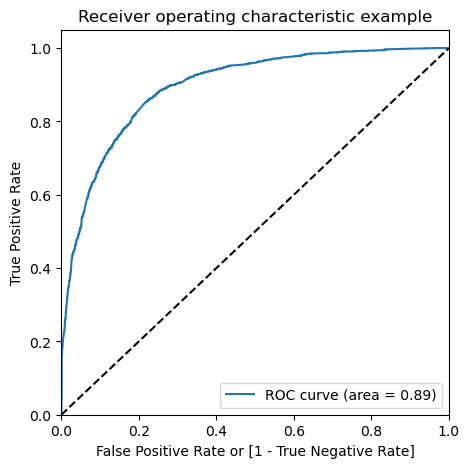

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

In [127]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.674146,2240,1,1,1,1,1,1,1,1,0,0,0
1,0,0.606581,113,1,1,1,1,1,1,1,1,0,0,0
2,1,0.672591,4132,1,1,1,1,1,1,1,1,0,0,0
3,0,0.124031,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.018385,1109,0,1,0,0,0,0,0,0,0,0,0


In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.647627  0.971974  0.440643
0.2   0.2  0.763449  0.922015  0.662260
0.3   0.3  0.800949  0.876929  0.752462
0.4   0.4  0.815665  0.781072  0.837740
0.5   0.5  0.816614  0.713241  0.882582
0.6   0.6  0.807120  0.637693  0.915241
0.7   0.7  0.786234  0.532900  0.947900
0.8   0.8  0.764873  0.447197  0.967600
0.9   0.9  0.717722  0.296101  0.986781


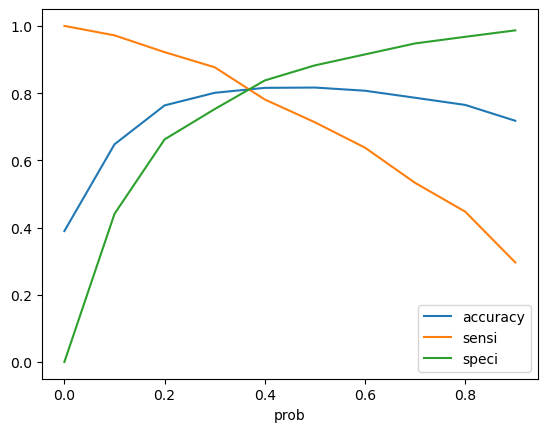

In [129]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [130]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.674146,2240,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.606581,113,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.672591,4132,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.124031,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.018385,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [131]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.674146,2240,1,1,1,1,1,1,1,1,0,0,0,1,67
1,0,0.606581,113,1,1,1,1,1,1,1,1,0,0,0,1,61
2,1,0.672591,4132,1,1,1,1,1,1,1,1,0,0,0,1,67
3,0,0.124031,5573,0,1,1,0,0,0,0,0,0,0,0,0,12
4,0,0.018385,1109,0,1,0,0,0,0,0,0,0,0,0,0,2
5,0,0.046854,2282,0,1,0,0,0,0,0,0,0,0,0,0,5
6,1,0.885647,2976,1,1,1,1,1,1,1,1,1,1,0,1,89
7,0,0.416144,8431,0,1,1,1,1,1,0,0,0,0,0,1,42
8,1,0.700194,2770,1,1,1,1,1,1,1,1,1,0,0,1,70
9,1,0.995715,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [132]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1993
0     469
Name: final_predicted, dtype: int64

In [133]:
# check the precentage of final_predicted conversions

1965/float(1965+497)

0.7981316003249391

 Hence we can see that the final prediction of conversions have a target of 80% (79.8%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

In [134]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8142405063291139

In [136]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3153,  705],
       [ 469, 1993]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8095044679122665

In [139]:
# Let us calculate specificity

TN / float(TN+FP)

0.8172628304821151

In [140]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.1827371695178849


In [141]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7386953298739807


In [142]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8705135284373274


##### Metrics - Precision and Recall

In [143]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3405,  453],
       [ 706, 1756]], dtype=int64)

In [144]:
from sklearn.metrics import precision_score, recall_score

In [145]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7949298325033952

In [146]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7132412672623883

### Precision and recall tradeoff

In [147]:
from sklearn.metrics import precision_recall_curve

In [148]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

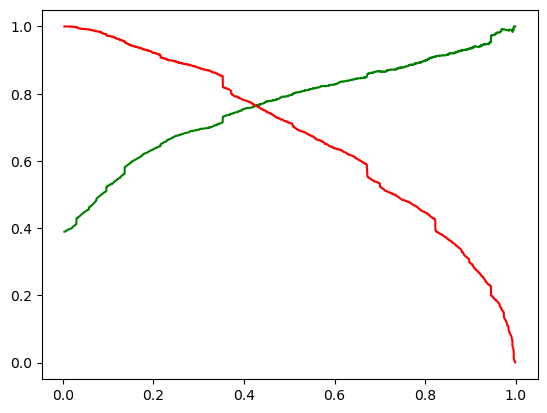

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [151]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [152]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_No Information,CurrentOccupation_Working Professional,CurrentOccupation_Working Professional,CurrentOccupation_Working Professional,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Unreachable
2296,0,0.1875,0.665313,0.37500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8697,0,0.4375,0.184032,0.21875,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7378,0,0.1250,0.163284,0.25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8631,0,0.3125,0.407307,0.62500,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4799,0,0.5000,0.744700,1.00000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [153]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [154]:
y_test_pred = res.predict(X_test_sm)

In [155]:
y_test_pred[:10]

2296    0.903403
8697    0.644376
7378    0.205788
8631    0.600733
4799    0.933285
4503    0.371735
7129    0.892595
1717    0.136486
8398    0.830476
5116    0.215643
dtype: float64

In [156]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:
# Let's see the head

y_pred_1.head()

,0
2296,0.903403
8697,0.644376
7378,0.205788
8631,0.600733
4799,0.933285


In [158]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [159]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [160]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [161]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [162]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.903403
1,0,8697,0.644376
2,0,7378,0.205788
3,0,8631,0.600733
4,1,4799,0.933285


In [163]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [165]:
# Rearranging the columns
y_pred_final = y_pred_final[['LeadId', 'Converted', 'Converted_Prob']]

In [166]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,2296,1,0.903403
1,8697,0,0.644376
2,7378,0,0.205788
3,8631,0,0.600733
4,4799,1,0.933285


In [167]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [168]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,2296,1,0.903403,1
1,8697,0,0.644376,1
2,7378,0,0.205788,0
3,8631,0,0.600733,1
4,4799,1,0.933285,1


In [169]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,2296,1,0.903403,1,90
1,8697,0,0.644376,1,64
2,7378,0,0.205788,0,21
3,8631,0,0.600733,1,60
4,4799,1,0.933285,1,93
5,4503,0,0.371735,1,37
6,7129,0,0.892595,1,89
7,1717,0,0.136486,0,14
8,8398,0,0.830476,1,83
9,5116,1,0.215643,0,22


In [170]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    813
0    202
Name: final_predicted, dtype: int64

In [171]:
# check the precentage of final_predicted conversions on test data

797/float(797+218)

0.7852216748768472

##### Hence we can see that the final prediction of conversions have a target rate of 79% (78.5%) (Around 1 % short of the predictions made on training data set)

In [172]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8128460686600222

In [173]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1389,  305],
       [ 202,  813]], dtype=int64)

In [174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [175]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8009852216748768

In [176]:
# Let us calculate specificity
TN / float(TN+FP)

0.819952774498229

##### Precision and Recall metrics for the test set 

In [177]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7271914132379249
recall  0.8009852216748768


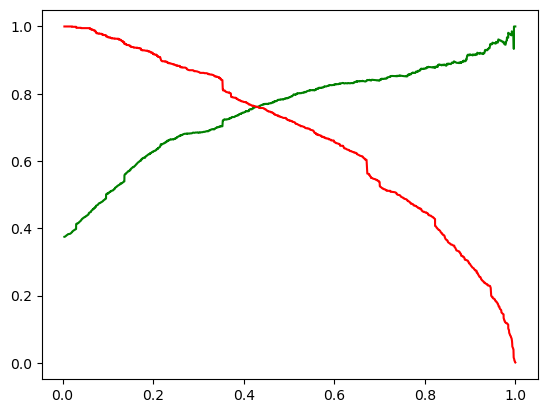

In [178]:

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Conclusion

We evaluated both Sensitivity-Specificity and Precision-Recall metrics to determine the optimal cut-off for the final prediction, focusing on Sensitivity and Specificity.
The test set results show Accuracy, Sensitivity, and Specificity values of approximately 81%, 79%, and 82%, respectively, which are close to the values obtained from the training set.
The calculated lead score indicates a conversion rate of around 80% in the training set and 79% in the test set.
The top three variables contributing most to lead conversion in the model are:
Total Time Spent on Website
Lead Add Form (from Lead Origin)
Had a Phone Conversation (from Last Notable Activity)
Overall, this model appears to be effective.